## Aufgabe
Implementiere den folgenden Algorithmus für das Beispiel der Containersuche aus der Vorlesung.

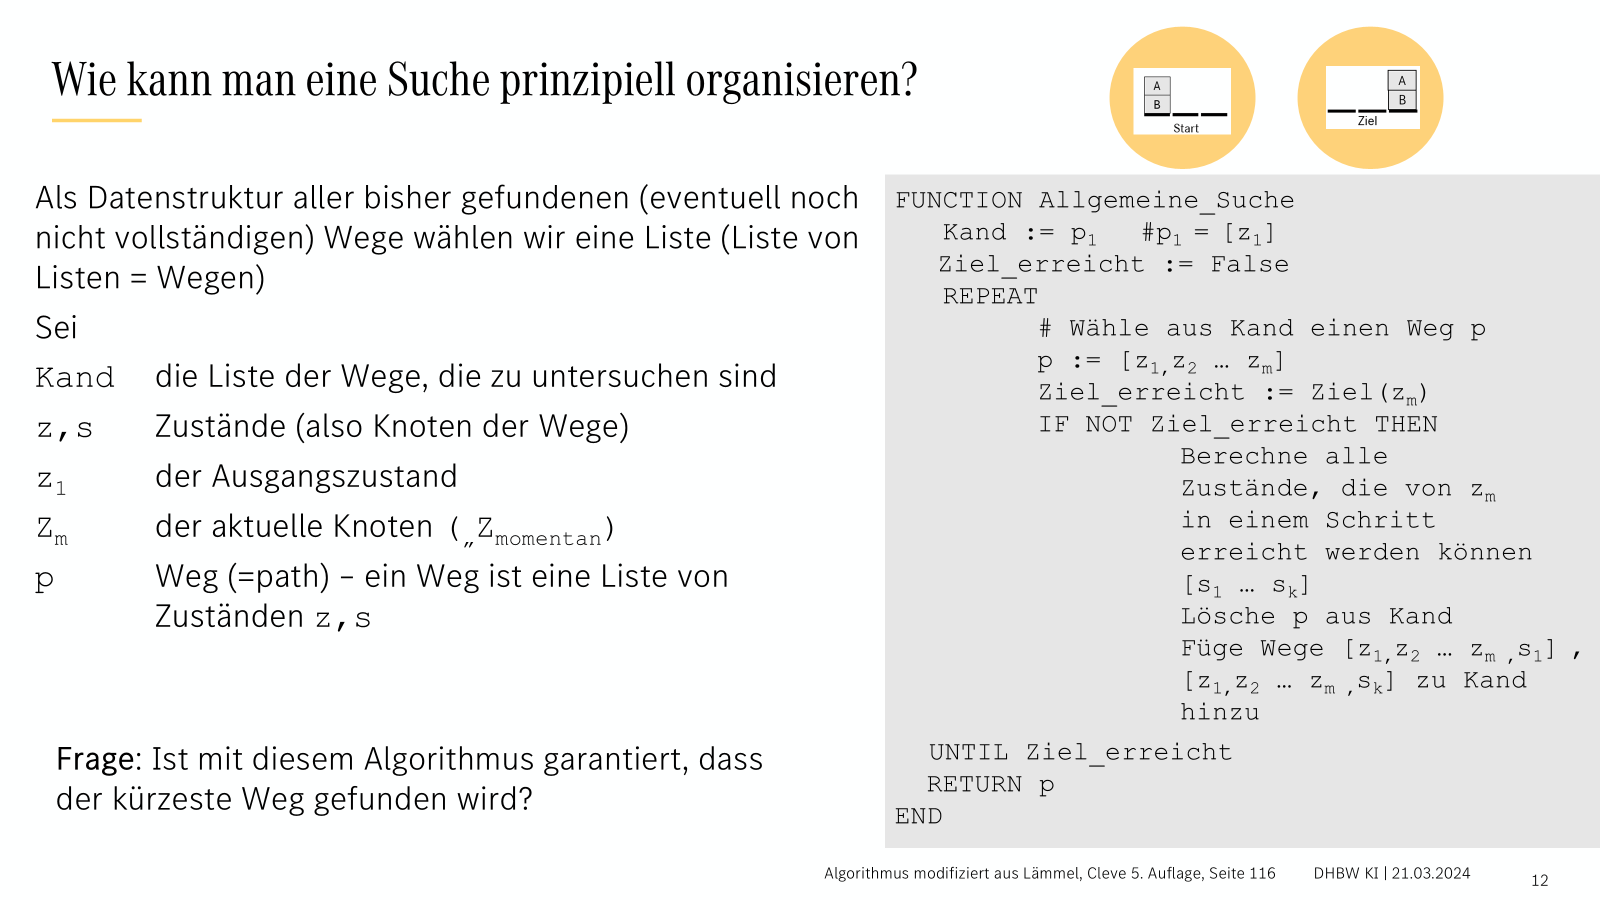

In [12]:
graph = {
    11: [21, 22],
    21: [31, 32, 22, 11],
    22: [33, 34, 11, 21],
    31: [32, 21],
    32: [41, 42, 31, 21],
    33: [22, 34],
    34: [43, 33, 22],
    41: [32],
    42: [32],
    43: [51, 34],
    51: [43]
}

def allgemeine_suche(graph, start, ziel):
    # Kandidaten initialisieren mit dem Startknoten
    kand = [[start]]  # p1 = [z1] mit z1 = start
    ziel_erreicht = False

    while not ziel_erreicht:
        # Wähle einen Weg p aus Kand
        p = kand.pop(-1)
        # Aktuellen Zustand (letzter Knoten im Weg) bestimmen
        zm = p[-1]
        # Überprüfe, ob das Ziel erreicht ist
        ziel_erreicht = zm == ziel
        if not ziel_erreicht:
            # Berechne alle erreichbaren Zustände von zm
            erreichbareZustände = graph[zm]
            # Lösche p aus Kand
            # (in diesem Fall bereits durch pop())
            #print(f"pfad: {p} zm: {zm} erreichbare: {erreichbareZustände}")
            for erreichbarerZustand in erreichbareZustände:
                newPath = p.copy()
                if not newPath.__contains__(erreichbarerZustand):
                    newPath.append(erreichbarerZustand)
                    kand.append(newPath)
  
    return p  # Rückgabe des gefundenen Pfades

# Beispielaufruf
start_knoten = 11
ziel_knoten = 42
ergebnis = allgemeine_suche(graph, start_knoten, ziel_knoten)

print("Gefundener Pfad:", ergebnis)

Gefundener Pfad: [11, 22, 21, 32, 42]


## Übungsaufgabe 2
Implementiere die Funktionen aus Folie 28.
Was ist die Tiefen- was ist die Breitensuche. Wo liegt der Unterschied ?

## Übungsaufgabe 3: Implementiere A*

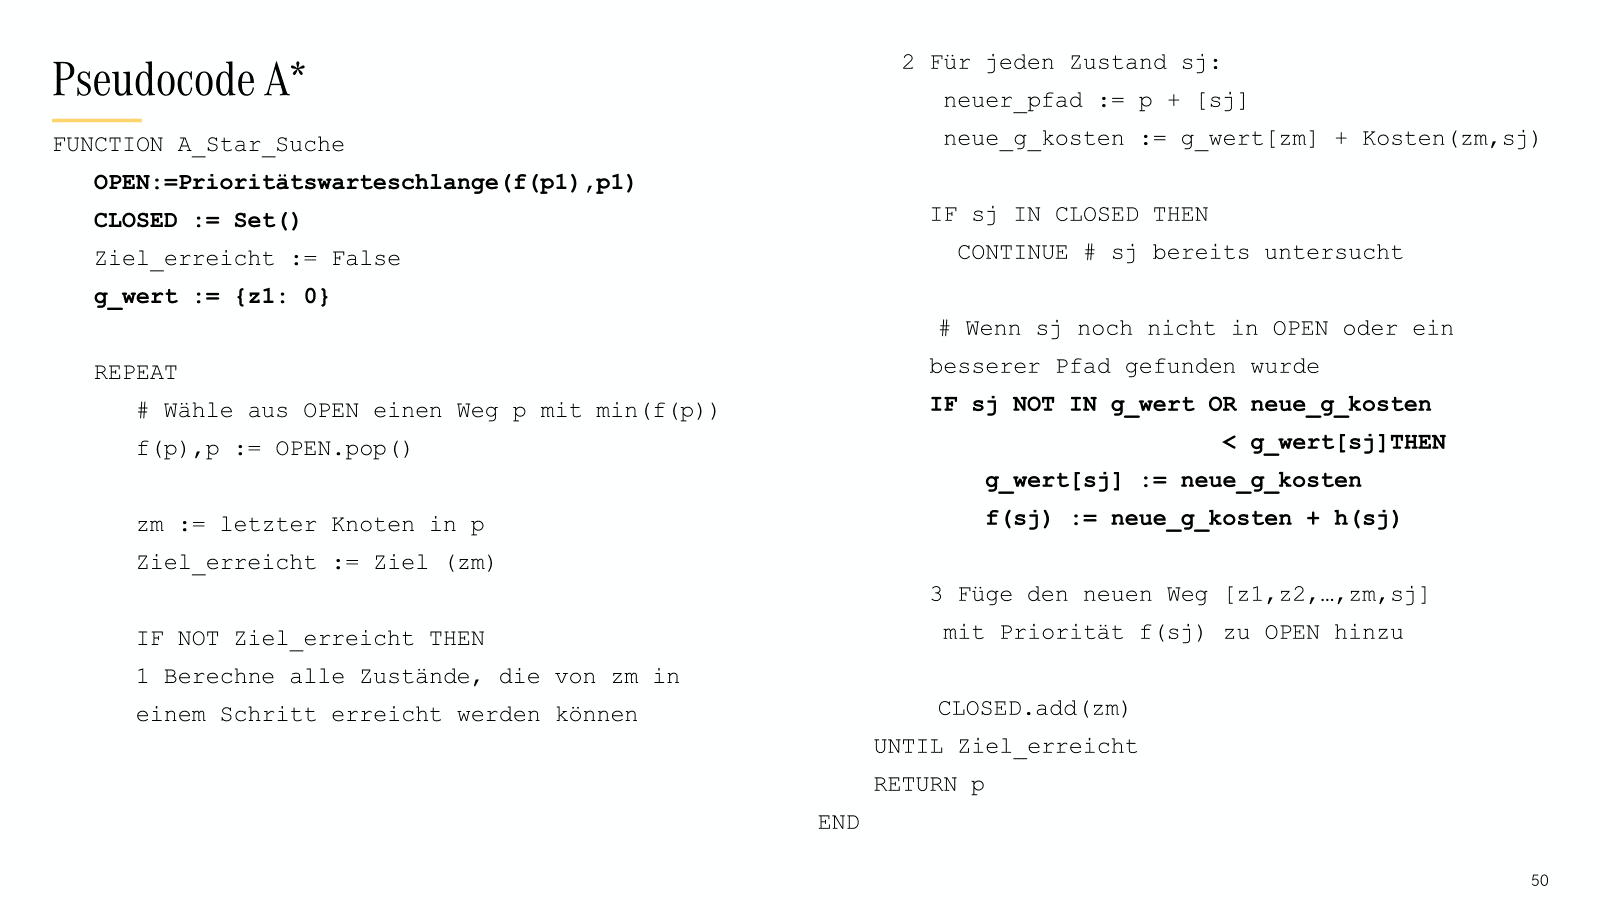

# Lösung

### Schritt 1: Landkarte als Graph initialisieren



In [13]:
graph = {
    'Basel': [('Bern', 91), ('Zürich', 85), ('Karlsruhe',191)],
    'Bayreuth': [('Nürnberg', 75)],
    'Bern': [('Zürich', 120),('Basel',91)],
    'Frankfurt': [('Würzburg', 111),('Mannheim',85)],
    'Innsbruck': [('Rosenheim', 93),('Landeck',73)],
    'Karlsruhe': [('Mannheim', 67),('Stuttgart',64),('Basel',191)],
    'Landeck': [('Innsbruck', 73)],
    'Linz': [('Passau', 102),('Salzburg',126)],
    'München': [('Rosenheim', 59),('Nürnberg',170),('Ulm',123),('Memmingen',115)],
    'Mannheim': [('Frankfurt', 85),('Nürnberg',230),('Karlsruhe',67)],
    'Memmingen': [('Ulm', 55),('München',115),('Zürich',184)],
    'Nürnberg': [('Bayreuth', 75),('Würzburg',104),('Ulm',171),('München',170),('Passau',220)],
    'Passau': [('Nürnberg', 220),('München',189),('Linz',102)],
    'Rosenheim': [('München', 59),('Innsbruck',93),('Salzburg',81)],
    'Stuttgart': [('Karlsruhe', 64),('Ulm',107),('Würzburg',140)],
    'Salzburg': [('Rosenheim', 81),('Linz',126)],
    'Würzburg': [('Frankfurt', 111),('Stuttgart',140),('Ulm',183),('Nürnberg',104)],
    'Zürich': [('Bern', 120),('Basel',85),('Memmingen',184)]}



def heuristik(n):
    heuristics = {'Basel': 204, 
                  'Bayreuth': 207,
                  'Bern': 247,
                  'Frankfurt': 215,
                  'Innsbruck': 163, 
                  'Karlsruhe': 137,
                  'Landeck':143,
                  'Linz': 318,
                  'München':120,
                  'Mannheim':164,
                  'Memmingen':47,
                  'Nürnberg':132,
                  'Passau':257,
                  'Rosenheim':168,
                  'Stuttgart':75,
                  'Salzburg':236,
                  'Würzburg':153,
                  'Zürich':157}
    return heuristics.get(n, float('inf'))

### Schritt 2: A* Implementierung

In [14]:
#import heapq as hq

def a_star_search(start, goal, graph, h):
    # OPEN ist die Prioritätswarteschlange mit der Startknoten-Information
    open = [([start], h(start))]
    # CLOSED ist die Menge der bereits besuchten Knoten
    closed = set()
    # g-Wert speichert die tatsächlichen Kosten vom Start zu jedem Knoten
    g = {
        start: 0,
    }
    # Solange das Ziel nicht erreicht wurde
    while open:
        # Wähle den Pfad p mit dem kleinsten f(p) aus OPEN
        heuristics = list(map(lambda node: node[1], open))
        index = heuristics.index(min(heuristics))
        path = open[index]

        # Überprüfe, ob das Ziel erreicht wurde
        zm = path[-1]
        print(f"zm: {zm}")
        ziel_erreicht = zm == goal
        if ziel_erreicht: return path

        # Berechne alle Zustände (Nachbarn), die von zm erreicht werden können
        neighbours = graph(zm)
        for neighbour in neighbours:
            # Wenn der Nachbar bereits in CLOSED ist, überspringen
            if closed.__contains__(neighbour): continue

            # Wenn der Nachbar nicht in g_wert ist oder ein besserer Pfad gefunden wurde
            g_of_neighbour = g[neighbour[0]]
            new_path_g = sum(list(map(lambda node: node[1], path))) + filter(lambda anyNeighbour: anyNeighbour==neighbour, graph[zm])[1]
            if g_of_neighbour == None or g_of_neighbour > new_path_g:
                open.append(path + [neighbour], new_path_g + h(neighbour))
                # Füge den neuen Pfad mit Priorität f(sj) zur OPEN-Liste hinzu
                

        # Füge den aktuellen Knoten zur CLOSED-Liste hinzu
        closed.add(zm)

    return None  # Kein Pfad gefunden

### Schritt 3: Anwendung + Ausgabe des Pfades

In [15]:
# Starte die A*-Suche
start_node = 'Linz'
goal_node = 'Ulm'
result_path = a_star_search(start_node, goal_node, graph, heuristik)

print("Gefundener Pfad:", result_path)

zm: 318


TypeError: 'dict' object is not callable